# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [110]:
sinasc = pd.read_csv("./sinasc_RO_2019.csv")
df = sinasc[['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 
 'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5','SEXO', 'PESO']]

In [111]:
df.head()

,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,GESTACAO,GRAVIDEZ,CONSULTAS,APGAR5,SEXO,PESO
0,1,19,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0,Masculino,3685
1,1,29,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,9.0,Feminino,3055
2,1,37,9.0,8 a 11 anos,2.0,37 a 41 semanas,Única,4,10.0,Feminino,3460
3,1,30,5.0,12 anos ou mais,0.0,37 a 41 semanas,Única,3,10.0,Feminino,2982
4,1,30,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,10.0,Feminino,3310


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [112]:
df = df[~df['APGAR5'].isna()]

In [113]:
df.loc[df['APGAR5'] <= 3.0, 'NIVEL ASFIXIA'] = 'Asfixia Severa'
df.loc[(df['APGAR5'] >=4.0) & (df['APGAR5'] <= 5.0) , 'NIVEL ASFIXIA'] = 'Asfixia Moderada'
df.loc[(df['APGAR5'] >=6.0) & (df['APGAR5'] <= 7.0) , 'NIVEL ASFIXIA'] = 'Asfixia Leve'
df.loc[df['APGAR5'] >= 8.0, 'NIVEL ASFIXIA'] = 'Normal'

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

SEXO    Feminino  Masculino
APGAR5                     
0.0            9          8
1.0           15          9
2.0            9          8
3.0            7          8
4.0           11         12
5.0           21         24
6.0           35         43
7.0          106        135
8.0          911       1083
9.0         7863       8212
10.0        4103       4289


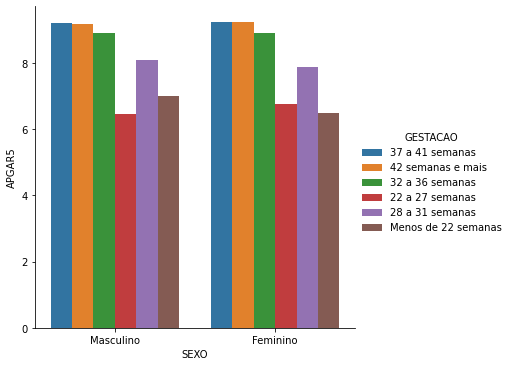

In [50]:
sns.catplot(x = 'SEXO',
            y = 'APGAR5',
            hue = 'GESTACAO',
            kind = 'bar',
            ci = None,
            data = df)

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [60]:
apggst = pd.crosstab(df['GESTACAO'], df['APGAR5'])
print(apggst)

APGAR5               0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   \
GESTACAO                                                                    
22 a 27 semanas         7     0     8     6     1     0     2    10    24   
28 a 31 semanas         0     0     2     1     5     7     7    11    61   
32 a 36 semanas         2     2     2     2     8    11    17    56   362   
37 a 41 semanas         5    20     3     5     7    21    45   151  1417   
42 semanas e mais       1     0     0     0     0     1     1     5    44   
Menos de 22 semanas     1     0     1     0     0     0     0     1     0   

APGAR5                9.0   10.0  
GESTACAO                          
22 a 27 semanas         19     8  
28 a 31 semanas         55    13  
32 a 36 semanas       1307   465  
37 a 41 semanas      13565  7284  
42 semanas e mais      423   223  
Menos de 22 semanas      3     1  


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [68]:
apggst_pctlin = apggst.div(apggst.sum(axis = 1), axis = 0)
print(apggst_pctlin)

APGAR5                   0.0       1.0       2.0       3.0       4.0   \
GESTACAO                                                                
22 a 27 semanas      0.082353  0.000000  0.094118  0.070588  0.011765   
28 a 31 semanas      0.000000  0.000000  0.012346  0.006173  0.030864   
32 a 36 semanas      0.000895  0.000895  0.000895  0.000895  0.003581   
37 a 41 semanas      0.000222  0.000888  0.000133  0.000222  0.000311   
42 semanas e mais    0.001433  0.000000  0.000000  0.000000  0.000000   
Menos de 22 semanas  0.142857  0.000000  0.142857  0.000000  0.000000   

APGAR5                   5.0       6.0       7.0       8.0       9.0   \
GESTACAO                                                                
22 a 27 semanas      0.000000  0.023529  0.117647  0.282353  0.223529   
28 a 31 semanas      0.043210  0.043210  0.067901  0.376543  0.339506   
32 a 36 semanas      0.004924  0.007610  0.025067  0.162041  0.585049   
37 a 41 semanas      0.000932  0.001998  0.006704 

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<AxesSubplot:xlabel='GESTACAO'>

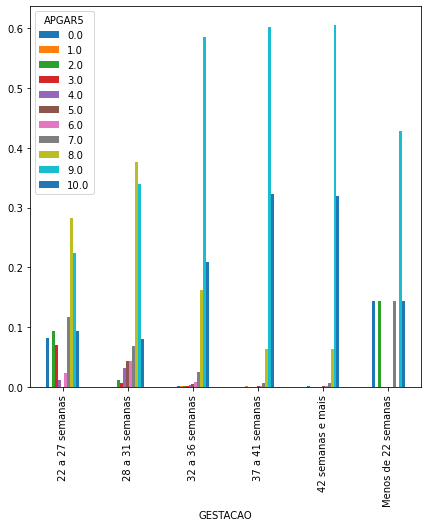

In [78]:
apggst_pctlin.plot.bar(figsize = (7,7))

Após obsevar o gráfico da tabela cruzada é possivel notar que o nível de axfixia esta diretamente ligado ao tempo de gestação, já que após a 36ª semana de gestação a porcentagem de bebês com Apgar5 abaixo do normal se torna muito menor do que as crianças que nasceram prematuras.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<AxesSubplot:xlabel='NIVEL ASFIXIA', ylabel='PESO'>

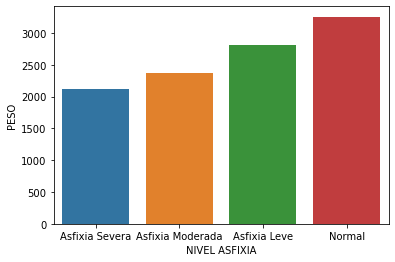

In [127]:
sns.barplot(x = 'NIVEL ASFIXIA', 
            y = 'PESO',
            ci = None,
            order = ('Asfixia Severa','Asfixia Moderada','Asfixia Leve', 'Normal'),
            data = df)

Podemos notar que o nível de asfixia também está ligado ao peso, a tendência é de que crianças com menos de 3Kg estejam mais propensas a ter asfixia, além disso, conforme o peso diminui pior é o nível de asfixia do bebê.